Problem Statement - Prepare a document for each model explaining how many dummy variables you have created and RMSE value for each model. Finally which model you will use for Forecasting.

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf 
%matplotlib inline 
#Data Driven Methods
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 
import warnings
warnings.filterwarnings('ignore')

In [43]:
data = pd.read_excel("CocaCola_Sales_Rawdata.xlsx")

In [44]:
data.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


### Exploratory Data Analysis

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [46]:
data.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [47]:
# Segregate Quaeter Values and Year values
data['Quarters'] =0
data['Year'] =0
for i in range(42):
    p = data["Quarter"][i]
    data['Quarters'][i]= p[0:2]
    data['Year'][i]= p[3:5]

In [48]:
# Getting dummy variables for Quarters Q1, Q2, Q3, Q4 
Quarters_Dummies = pd.DataFrame(pd.get_dummies(data['Quarters']))
data = pd.concat([data,Quarters_Dummies],axis = 1)
data.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,86,1,0,0,0
1,Q2_86,2244.960999,Q2,86,0,1,0,0
2,Q3_86,2533.804993,Q3,86,0,0,1,0
3,Q4_86,2154.962997,Q4,86,0,0,0,1
4,Q1_87,1547.818996,Q1,87,1,0,0,0


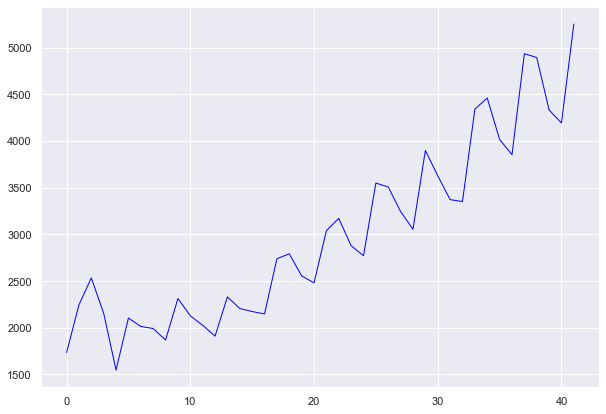

In [49]:
# Lineplot for Sales of CocaCola
plt.figure(figsize=(10,7))
plt.plot(data['Sales'], color = 'blue', linewidth=1)

In [50]:
# As we can see above in the line chart , we can observe a pattern of expontial additive seasonality

<AxesSubplot:>

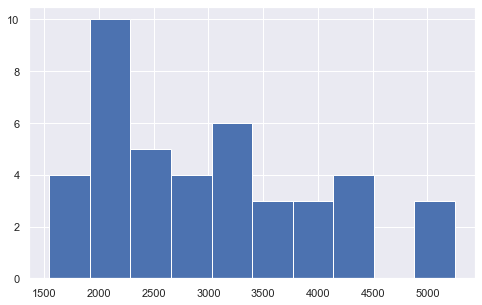

In [51]:
# Histogram
data['Sales'].hist(figsize=(8,5))

<AxesSubplot:ylabel='Density'>

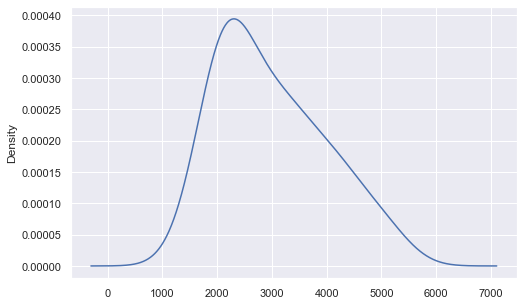

In [52]:
# Density Plot
data['Sales'].plot(kind = 'kde', figsize=(8,5))

<AxesSubplot:xlabel='Quarters', ylabel='Sales'>

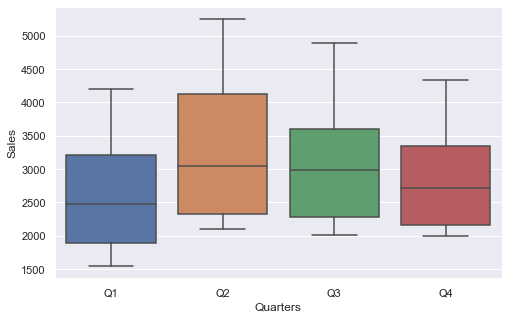

In [53]:
#boxplot of Quarters Vs. Sales
sns.set(rc={'figure.figsize':(8,5)})
sns.boxplot(x="Quarters",y="Sales",data=data)

<AxesSubplot:xlabel='Year', ylabel='Sales'>

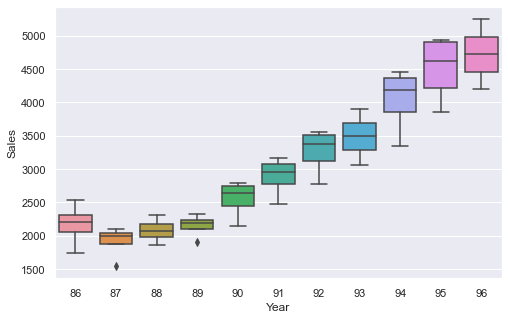

In [54]:
# boxplot of Years Vs. Sales
sns.boxplot(x="Year",y="Sales",data=data)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


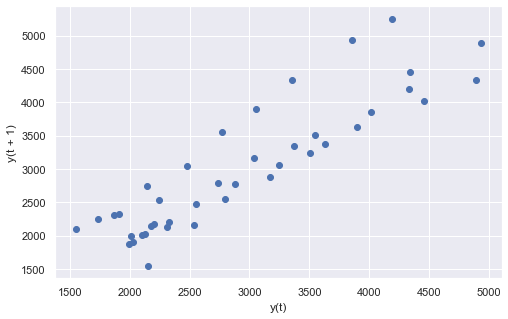

In [55]:
from pandas.plotting import lag_plot
lag_plot(data['Sales'])
plt.show()

<AxesSubplot:xlabel='Sales', ylabel='Density'>

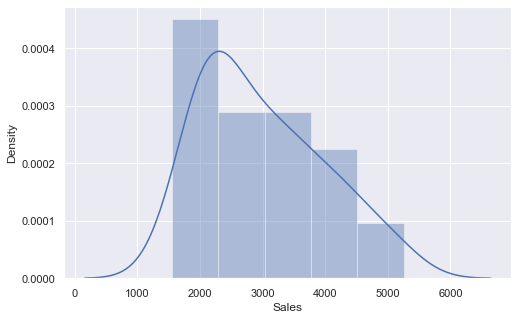

In [56]:
sns.distplot(data['Sales'])

<AxesSubplot:xlabel='Year', ylabel='Sales'>

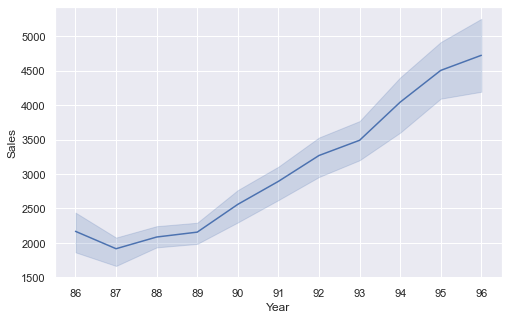

In [57]:
plt.figure(figsize=(8,5))
sns.lineplot(x="Year",y="Sales",data=data)

<AxesSubplot:xlabel='Quarters', ylabel='Year'>

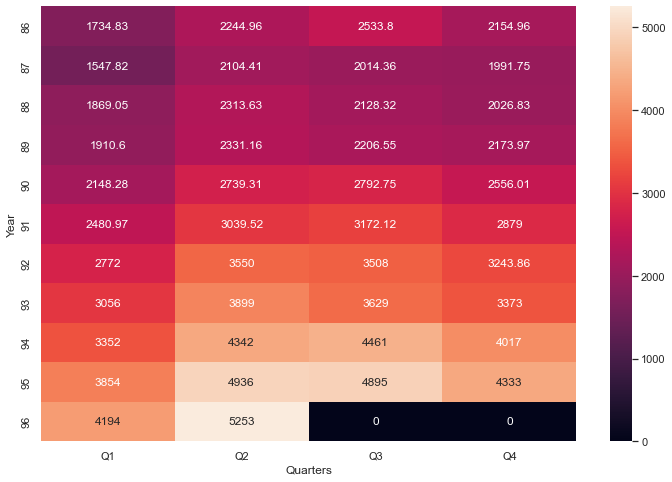

In [58]:
plt.figure(figsize=(12, 8))
heatmap_y_month = pd.pivot_table(data=data,values="Sales",index="Year",columns="Quarters",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")

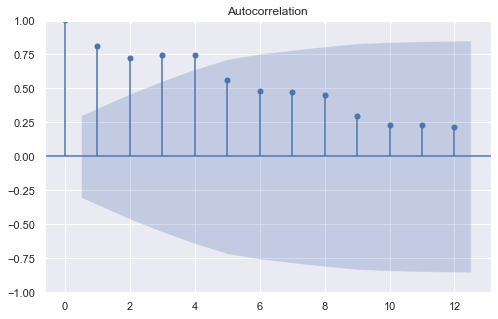

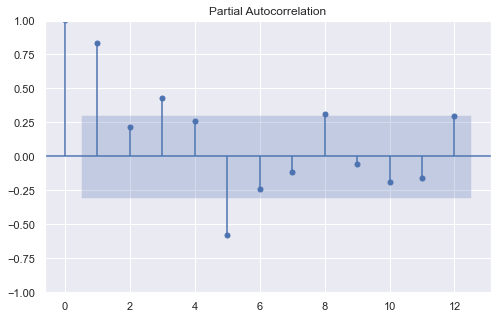

In [59]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(data.Sales,lags=12)
tsa_plots.plot_pacf(data.Sales,lags=12)
plt.show()

### Spliting Train and Test Data 

In [60]:
train = data.head(32)
test = data.tail(10)

In [61]:
train

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,86,1,0,0,0
1,Q2_86,2244.960999,Q2,86,0,1,0,0
2,Q3_86,2533.804993,Q3,86,0,0,1,0
3,Q4_86,2154.962997,Q4,86,0,0,0,1
4,Q1_87,1547.818996,Q1,87,1,0,0,0
5,Q2_87,2104.411995,Q2,87,0,1,0,0
6,Q3_87,2014.362999,Q3,87,0,0,1,0
7,Q4_87,1991.746998,Q4,87,0,0,0,1
8,Q1_88,1869.049999,Q1,88,1,0,0,0
9,Q2_88,2313.631996,Q2,88,0,1,0,0


In [62]:
test

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4
32,Q1_94,3352.0,Q1,94,1,0,0,0
33,Q2_94,4342.0,Q2,94,0,1,0,0
34,Q3_94,4461.0,Q3,94,0,0,1,0
35,Q4_94,4017.0,Q4,94,0,0,0,1
36,Q1_95,3854.0,Q1,95,1,0,0,0
37,Q2_95,4936.0,Q2,95,0,1,0,0
38,Q3_95,4895.0,Q3,95,0,0,1,0
39,Q4_95,4333.0,Q4,95,0,0,0,1
40,Q1_96,4194.0,Q1,96,1,0,0,0
41,Q2_96,5253.0,Q2,96,0,1,0,0


# MA Method

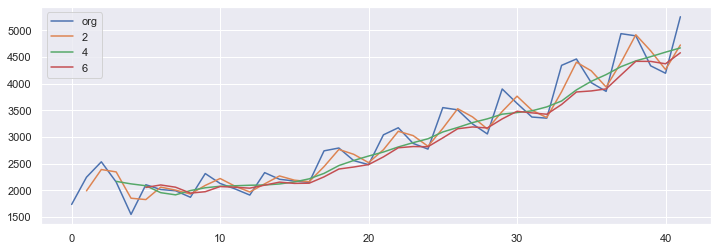

In [63]:
plt.figure(figsize=(12,4))
data.Sales.plot(label="org")
for i in range(2,8,2):
    data["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

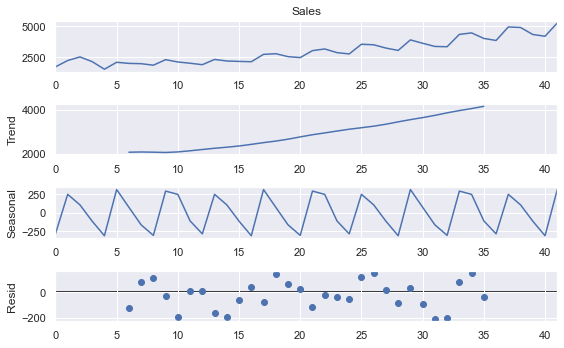

In [64]:
# Time Series Decomposition Plot

from statsmodels.tsa.seasonal import seasonal_decompose

decompose_ts_add = seasonal_decompose(data.Sales,period=12)
decompose_ts_add.plot()
plt.show()


In [65]:
def RMSE(org, pred):
    rmse=np.sqrt(np.mean((np.array(org)-np.array(pred))**2))
    return rmse

### Simple Exponential Method

In [66]:
import warnings
warnings.filterwarnings("ignore")

ses_model = SimpleExpSmoothing(train["Sales"]).fit()
pred_ses = ses_model.predict(start = test.index[0],end = test.index[-1])
rmse_ses_model = RMSE(test.Sales, pred_ses)
rmse_ses_model

1034.9359056453961

## Holt Method

In [67]:
hw_model = Holt(train["Sales"]).fit()
pred_hw = hw_model.predict(start = test.index[0],end = test.index[-1])
rmse_hw_model = RMSE(test.Sales, pred_hw)
rmse_hw_model

941.6367810616845

### Holt Winter Exponential Smoothing With Additive Seasonality and Additive Trend

In [68]:
hwe_model_add_add = ExponentialSmoothing(train["Sales"],seasonal="add",trend="add",seasonal_periods=4).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = test.index[0],end = test.index[-1])
rmse_hwe_add_add_model = RMSE(test.Sales, pred_hwe_add_add)
rmse_hwe_add_add_model

633.4394050169811

### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [69]:
hwe_model_mul_add = ExponentialSmoothing(train["Sales"],seasonal="mul",trend="add",seasonal_periods=4).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = test.index[0],end = test.index[-1])
rmse_hwe_model_mul_add_model = RMSE(test.Sales, pred_hwe_mul_add)
rmse_hwe_model_mul_add_model

568.1679856842486

## Model Based Forecasting Methods

In [70]:
# Data preprocessing for models
data["t"] = np.arange(1,43)
data["t_squared"] = data["t"]*data["t"]

data["log_sales"] = np.log(data["Sales"])

data.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4,t,t_squared,log_sales
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5,25,7.344602


### Linear Model

In [71]:
train = data.head(32)
test = data.tail(10)

linear_model = smf.ols('Sales~t',data=train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
rmse_linear_model = RMSE(test['Sales'],pred_linear)
rmse_linear_model

752.9233932767132

### Exponential Model

In [72]:
Exp = smf.ols('log_sales~t',data=train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(test['t'])))
rmse_Exp_model = RMSE(test['Sales'], np.exp(pred_Exp))
rmse_Exp_model

590.3316432076668

### Quadratic Model

In [73]:
Quad = smf.ols('Sales~t+t_squared',data=train).fit()
pred_Quad = pd.Series(Quad.predict(test[["t","t_squared"]]))
rmse_Quad_model = RMSE(test['Sales'], pred_Quad)
rmse_Quad_model

457.7357355407399

### Additive Seasonality Model

In [74]:
add_sea = smf.ols('Sales~Q1+Q2+Q3',data=train).fit()
pred_add_sea = pd.Series(add_sea.predict(test[['Q1', 'Q2', 'Q3']]))
rmse_add_sea = RMSE(test['Sales'], pred_add_sea)
rmse_add_sea

1850.466546185836

### Additive Seasonality Quadratic model

In [75]:
add_sea_Quad = smf.ols('Sales~t+t_squared+Q1+Q2+Q3',data=train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(test[['Q1','Q2','Q3','t','t_squared']]))
rmse_add_sea_Quad_model = RMSE(test['Sales'], pred_add_sea_quad)
rmse_add_sea_Quad_model 

277.351077112882

### Multiplicative Seasonality model

In [76]:
Mul_sea = smf.ols('log_sales~Q1+Q2+Q3',data=train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(test))
rmse_Mul_sea = RMSE(test['Sales'], np.exp(pred_Mult_sea))
rmse_Mul_sea

1908.2503948361164

### Multiplicative Additive Seasonality model

In [77]:
Mul_Add_sea = smf.ols('log_sales~t+Q1+Q2+Q3',data = train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(test))
rmse_Mul_Add_sea = RMSE(test['Sales'], np.exp(pred_Mult_add_sea))
rmse_Mul_Add_sea

448.86781826917996

In [78]:
list = [['Simple Exponential Method',rmse_ses_model], ['Holt method',rmse_hw_model],
          ['HW exp smoothing add',rmse_hwe_add_add_model],['HW exp smoothing mult',rmse_hwe_model_mul_add_model],
          ['Linear Mode',rmse_linear_model],['Exp model',rmse_Exp_model],['Quad model',rmse_Quad_model],
          ['add seasonality',rmse_add_sea],['Quad add seasonality',rmse_add_sea_Quad_model],
          ['Mult Seasonality',rmse_Mul_sea],['Mult add seasonality',rmse_Mul_Add_sea]]

In [79]:
df = pd.DataFrame(list, columns =['Model', 'RMSE_Value']) 
df

,Model,RMSE_Value
0,Simple Exponential Method,1034.935906
1,Holt method,941.636781
2,HW exp smoothing add,633.439405
3,HW exp smoothing mult,568.167986
4,Linear Mode,752.923393
5,Exp model,590.331643
6,Quad model,457.735736
7,add seasonality,1850.466546
8,Quad add seasonality,277.351077
9,Mult Seasonality,1908.250395


### From above table ,Quadratic Additive Seasonality model has less RMSE value 
#### So,we can consider this value for model building

In [80]:
data.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4,t,t_squared,log_sales
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5,25,7.344602


In [81]:
final_model = smf.ols('Sales~t+t_squared+Q1+Q2+Q3',data=data).fit()
pred_final = pd.Series(final_model.predict(data[['Q1','Q2','Q3','t','t_squared']]))
rmse_final_model = RMSE(data['Sales'], pred_final)
rmse_final_model

159.05522576522475

In [82]:
# Predict Values

pred_df = pd.DataFrame({'Actual' : data.Sales, 'Predicted' : pred_final})
pred_df

,Actual,Predicted
0,1734.827000,1626.592727
1,2244.960999,2268.402339
2,2533.804993,2189.685821
3,2154.962997,1867.242917
4,1547.818996,1658.311143
5,2104.411995,2314.185178
6,2014.362999,2249.533083
7,1991.746998,1941.154603
8,1869.049999,1746.287252
9,2313.631996,2416.225709
